In [1]:
"""
AUC curves for each neuron
"""

# Root path and directory
import sys
import os

ROOT_PATH = "E:/ADS/python/ams/isaccade"
os.chdir(ROOT_PATH)
#sys.path.insert(0, os.path.abspath('../'))

import numpy as np
import pandas as pd
from utils.funcs.readMatfiles import *

In [2]:
def roc_analysis(iRF,oRF):

    iRF = iRF[np.where(iRF>0)[0]]
    oRF = oRF[np.where(oRF>0)[0]]

    thresholds = list(range(0,250,5))
    in_spk=[]
    out_spk=[]
    for thresh in thresholds:
        ispk   = np.where(iRF<=thresh)[0]
        in_spk.append(len(ispk))
        ospk   = np.where(oRF<=thresh)[0]
        out_spk.append(len(ospk))

    in_spk  = [x/len(iRF) for x in in_spk]
    out_spk = [x/len(oRF) for x in out_spk]

    in_spk  = [0]+in_spk+[1]
    out_spk = [0]+out_spk+[1]

    curve = [in_spk,out_spk]

    return curve

In [3]:
# Figure for histograms
import matplotlib.pyplot as plt
#from utils.plots.pHIST import *

# Required files
ROOT_PATH = "E:/ADS/python/ams/isaccade"
get_data  = "data"
task      = "MG"
recordings = "fef"
analysis   = "population"
subject    = "m1"

path = "/".join([ROOT_PATH,get_data,task,recordings,analysis,subject])
print(path)

E:/ADS/python/ams/isaccade/data/MG/fef/population/m1


In [4]:
# A. Dataset1
fname = 'where/Nrn_dir_sroc.mat'
fpath = path+'/'+fname
data_dict1 = load_data(fpath)

Opening mat file v5.0 Path: E:/ADS/python/ams/isaccade/data/MG/fef/population/m1/where/Nrn_dir_sroc.mat


,Variables,Type,Fields,Dim
0,time,ndarray,int16,"(1, 1281)"
1,raw_Mf,ndarray,object,"(1, 3)"
2,sROC_,dict,"[sUnit, Bstrap, nBstrap]",3


In [5]:
# B. Dataset2
fname = 'type/Nrn_cell_mf.mat'
fpath = path+'/'+fname
data_dict2 = load_data(fpath)

Opening mat file v5.0 Path: E:/ADS/python/ams/isaccade/data/MG/fef/population/m1/type/Nrn_cell_mf.mat


,Variables,Type,Fields,Dim
0,EPOCHS,ndarray,int16,"(5, 2)"
1,time,ndarray,int16,"(1, 1281)"
2,BASAL,ndarray,float64,"(115, 3)"
3,VIS,ndarray,float64,"(115, 3)"
4,PREP,ndarray,float64,"(115, 3)"
5,SACC,ndarray,float64,"(115, 3)"
6,MOD_HT,ndarray,float64,"(115, 3)"
7,MOD_MO,ndarray,float64,"(115, 3)"
8,tBASAL,ndarray,object,"(2, 1)"
9,tVIS,ndarray,object,"(2, 1)"


In [6]:
sroc = data_dict1['sROC_']
time = np.transpose(data_dict1['time'])
print(sroc['sUnit'][0,0][0,0][0,1].shape)

(1281, 115)


In [7]:
# Extracting variables from dictionary
mfTime     = np.transpose(data_dict2['time'])
mfActivity = data_dict2['Mf_activity']
print(mfActivity.shape)

(115, 3)


In [8]:
# ROC Graphs for different events
tEvents,gEvents,mEvents = [0,1,2]
Events   = [tEvents, gEvents, mEvents]
target   = sroc['sUnit'][0,0][0,0][0,tEvents]
go       = sroc['sUnit'][0,0][0,0][0,gEvents]
movement = sroc['sUnit'][0,0][0,0][0,mEvents]
print(go)
print(go.shape)

# Time bins for ROC curve
troc = [150, -150, -25]
tbin = np.argwhere(troc==time)
tbin = tbin[tbin[:,1].argsort(),:]
rMf  = data_dict1['raw_Mf']


[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
(1281, 115)


In [9]:
# Plot figure and AUC
xevents = ['target','go','movement']
stages = ['Visual','Computational or preparatory','Planning']
epoch = [[50, 250],[-350,50],[-125,25]]
AUC = [target,go,movement]
timebins, N = AUC[gEvents].shape
iRF, oRF = [0, 1]
xlim = [[-250, 1250],[-1250, 750],[-1250, 250]]

In [10]:
id = 14
event = 0

roc = AUC[event][:,id]
Mf  = mfActivity[id, event]
inRF, outRF = Mf[:, iRF], Mf[:, oRF]

inSDF,outSDF = rMf[0,event][id,:]
inSDF        = inSDF[tbin[event,0],:]
outSDF       = outSDF[tbin[event, 0],:]

roc_curve = roc_analysis(inSDF,outSDF)


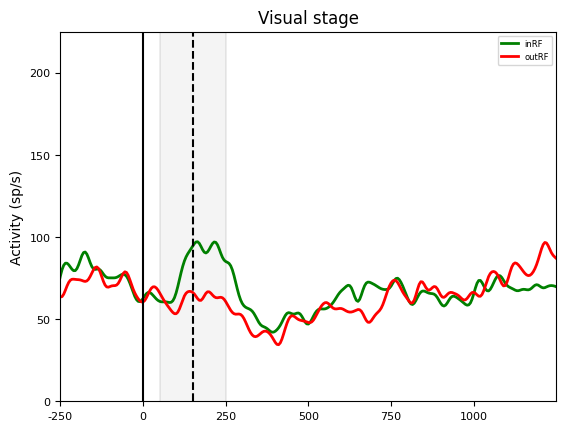

In [11]:
# SDF: Plotting spike density function

plt.plot(mfTime,inRF,'-g',linewidth=2,label='inRF')
plt.plot(mfTime,outRF,'-r',linewidth=2,label='outRF')
plt.fill_between(epoch[event],[250, 250],0, facecolor=[.8, .8, .8],alpha=0.2)
plt.vlines(0, 0, 250, linestyles='-',colors='k')
plt.vlines(epoch[event], 0, 250, linestyles='-', colors='k',linewidth=.1)
plt.vlines(troc[event], 0, 250, linestyles='--', colors='k')
plt.axis(xlim[event] + [0, 225])
plt.yticks(ticks=[0,50,100,150,200],labels=[])
plt.xticks(ticks=range(xlim[event][0],xlim[event][1],250),labels=[])
plt.title(stages[event]+' stage')
plt.ylabel('Activity (sp/s)')
plt.yticks(ticks=[0,50,100,150,200], labels=[0,50,100,150,200],fontsize=8)
plt.xticks(range(xlim[event][0],xlim[event][1],250),labels=range(xlim[event][0],xlim[event][1],250),fontsize=8)
plt.legend(loc='upper right', fontsize=6)

([<matplotlib.axis.YTick at 0x1ab9003bc50>,
 [Text(0, 0.0, '0'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1')])

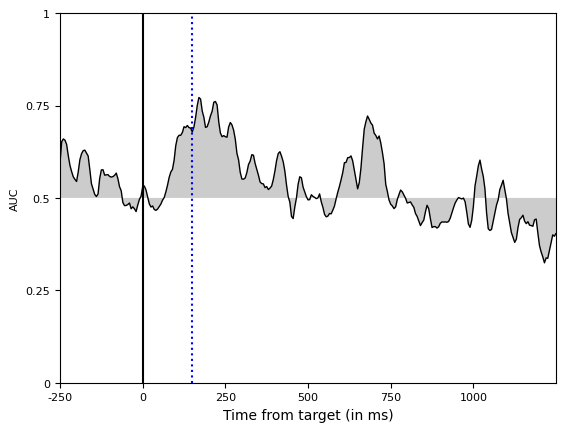

In [12]:
# Plotting ROC curves

plt.plot(time,roc,'-k',linewidth=1)
plt.fill_between(time.ravel(),roc,0.5,facecolor=[.8, .8, .8])
plt.vlines(0,0,1,linestyles='-',colors='k')
plt.vlines(troc[event], 0, 250, linestyles=':', colors='b')
plt.axis(xlim[event]+[0.25,1])
plt.xlabel('Time from '+xevents[event]+' (in ms)')
plt.yticks(ticks=[.25,.5,.75,1], labels=[])
plt.xticks(range(xlim[event][0],xlim[event][1],250),labels=range(xlim[event][0],xlim[event][1],250),fontsize=8)
plt.ylabel('AUC',fontsize=8)
plt.yticks(ticks=[0,.25, .5, .75, 1], labels=[0,.25, .5, .75, 1],fontsize=8)

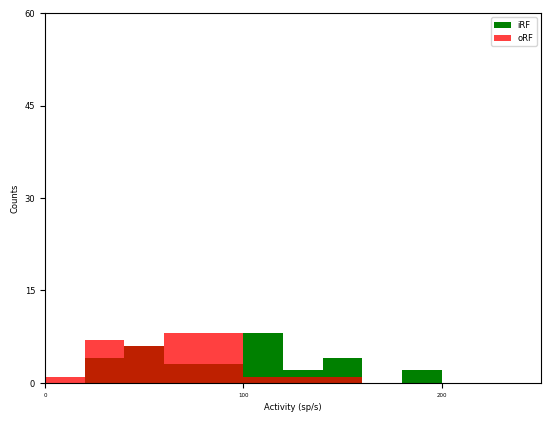

In [13]:
# ROC analysis for each time bin

plt.hist(x= inSDF,bins= range(-20,240,20),color='g',label = 'iRF')
plt.hist(x=outSDF,bins= range(-20,240,20),color='r',alpha = 0.75, label = 'oRF')
plt.xticks(ticks=[0,50,100,150,200,250],labels=[])
plt.yticks(ticks=[0, 15, 30, 45,60], labels=[])
plt.axis([0,250,0,50])
plt.xticks(ticks=[0, 100, 200], labels=[0,100,200],fontsize=4)
plt.yticks(ticks=[0, 15, 30, 45, 60], labels=[0, 15, 30, 45, 60],fontsize=6)
plt.xlabel('Activity (sp/s)',fontsize=6)
plt.ylabel('Counts',fontsize=6)
plt.legend(loc = 'upper right',fontsize=6)

Text(0.5, 0, 'iRF')

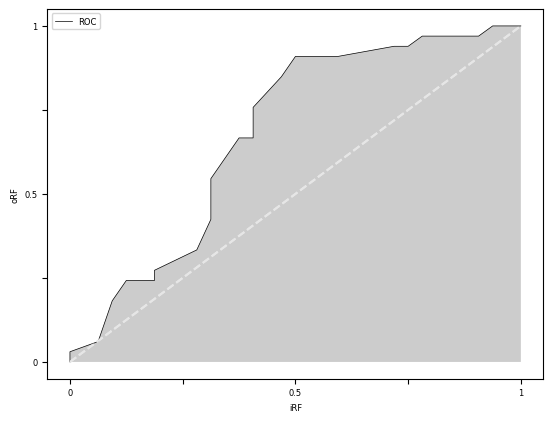

In [14]:

plt.plot([0,1],[0,1],linestyle='--',color=[.9,.9,.9])
plt.plot(roc_curve[0],roc_curve[1],'-k',linewidth=0.5,label='ROC')
plt.fill_between(roc_curve[0], roc_curve[1], 0, facecolor=[.8, .8, .8])
plt.xticks(ticks=[0,.25,.50,.75,1], labels=[])
plt.yticks(ticks=[0,.25,.50,.75,1], labels=[])
plt.plot([0, 1], [0, 1], linestyle='--', color=[.9, .9, .9])
plt.legend(loc='upper left', fontsize=6)
plt.xticks(ticks=[0,.25,.5,.75,1], labels=[0,'',.50,'',1],fontsize=6)
plt.yticks(ticks=[0,.25,.5,.75,1], labels=[0,'',.50,'',1],fontsize=6)
plt.ylabel('oRF',fontsize=6)
plt.xlabel('iRF',fontsize=6)

In [ ]:
for id in range(11,N):

    plt.subplots(4,6, figsize=(10,6),layout='tight')

    for event in Events:
        roc = AUC[event][:,id]
        Mf  = mfActivity[id, event]
        inRF, outRF = Mf[:, iRF], Mf[:, oRF]

        inSDF,outSDF = rMf[0,event][id,:]
        inSDF        = inSDF[tbin[event,0],:]
        outSDF       = outSDF[tbin[event, 0],:]

        roc_curve = roc_analysis(inSDF,outSDF)

        # Plotting spike density function
        idx = [(2*event)+x for x in (1,8)]
        idx = tuple(idx)
        plt.subplot(4,6,idx)
        #plt.subplot(3, 3, 4 + event)
        plt.plot(mfTime,inRF,'-g',linewidth=2,label='inRF')
        plt.plot(mfTime,outRF,'-r',linewidth=2,label='outRF')
        plt.fill_between(epoch[event],[250, 250],0, facecolor=[.8, .8, .8],alpha=0.2)
        plt.vlines(0, 0, 250, linestyles='-',colors='k')
        plt.vlines(epoch[event], 0, 250, linestyles='-', colors='k',linewidth=.1)
        plt.vlines(troc[event], 0, 250, linestyles='--', colors='k')
        plt.axis(xlim[event] + [0, 225])
        plt.yticks(ticks=[0,50,100,150,200],labels=[])
        plt.xticks(ticks=range(xlim[event][0],xlim[event][1],250),labels=[])
        plt.title(stages[event]+' stage')

        # Plotting ROC curves
        idx = [(2*event) + x for x in (13,14)]
        idx = tuple(idx)
        plt.subplot(4,6,idx)
        plt.plot(time,roc,'-k',linewidth=1)
        plt.fill_between(time.ravel(),roc,0.5,facecolor=[.8, .8, .8])
        plt.vlines(0,0,1,linestyles='-',colors='k')
        plt.vlines(troc[event], 0, 250, linestyles=':', colors='b')
        plt.axis(xlim[event]+[0.25,1])
        plt.xlabel('Time from '+xevents[event]+' (in ms)')
        plt.yticks(ticks=[.25,.5,.75,1], labels=[])
        plt.xticks(range(xlim[event][0],xlim[event][1],250),labels=range(xlim[event][0],xlim[event][1],250),fontsize=8)

        # ROC analysis for each time bin
        plt.subplot(4,6,19+(2*event))
        plt.hist(x= inSDF,bins= range(-20,240,20),color='g',label = 'iRF')
        plt.hist(x=outSDF,bins= range(-20,240,20),color='r',alpha = 0.75, label = 'oRF')
        plt.xticks(ticks=[0,50,100,150,200,250],labels=[])
        plt.yticks(ticks=[0, 15, 30, 45,60], labels=[])
        plt.axis([0,250,0,50])

        plt.subplot(4, 6, 20 + (2 * event))
        plt.plot([0,1],[0,1],linestyle='--',color=[.9,.9,.9])
        plt.plot(roc_curve[0],roc_curve[1],'-k',linewidth=0.5,label='ROC')
        plt.fill_between(roc_curve[0], roc_curve[1], 0, facecolor=[.8, .8, .8])
        plt.xticks(ticks=[0,.25,.50,.75,1], labels=[])
        plt.yticks(ticks=[0,.25,.50,.75,1], labels=[])

    # Formatting x and y axis
    plt.subplot(4,6,(1,8))
    plt.ylabel('Activity (sp/s)')
    plt.yticks(ticks=[0,50,100,150,200], labels=[0,50,100,150,200],fontsize=8)
    plt.legend(loc='upper right', fontsize=6)

    plt.subplot(4,6,(13,14))
    plt.ylabel('AUC',fontsize=8)
    plt.yticks(ticks=[0,.25, .5, .75, 1], labels=[0,.25, .5, .75, 1],fontsize=8)

    plt.subplot(4,6,19)
    plt.xticks(ticks=[0, 100, 200], labels=[0,100,200],fontsize=4)
    plt.yticks(ticks=[0, 15, 30, 45, 60], labels=[0, 15, 30, 45, 60],fontsize=6)
    plt.xlabel('Activity (sp/s)',fontsize=6)
    plt.ylabel('Counts',fontsize=6)
    plt.legend(loc = 'upper right',fontsize=6)

    plt.subplot(4,6,20)
    plt.plot([0, 1], [0, 1], linestyle='--', color=[.9, .9, .9])
    plt.legend(loc='upper left', fontsize=6)
    plt.xticks(ticks=[0,.25,.5,.75,1], labels=[0,'',.50,'',1],fontsize=6)
    plt.yticks(ticks=[0,.25,.5,.75,1], labels=[0,'',.50,'',1],fontsize=6)
    plt.ylabel('oRF',fontsize=6)
    plt.xlabel('iRF',fontsize=6)

    plt.suptitle('Event based analysis for neuron: '+str(id+1))
    plt.show()

    figfolder = 'results/roc_analysis/'
    figname   = 'Neuron'+str(id+1)+'.jpg'
    #plt.savefig(root_path+figfolder+figname)

    #plt.close()
